# ADIDAS STORE AND PROFIT ANALYSIS, USA FROM 2020 TO 2021

## IMPORTING LIBRARIES 

In [172]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default = "plotly_dark"

## READING IN DATA

In [173]:
data = pd.read_excel('C:/Users/User/OneDrive/Desktop/Hero Vired ABAD/Excel/AdidasData.xlsx')

In [174]:
data

,Retailer ID,Invoice Date,date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,1185732,2020-01-01,1,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.00,0.50,In-store
1,1185732,2020-01-02,1,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.00,0.30,In-store
2,1185732,2020-01-03,1,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.00,0.35,In-store
3,1185732,2020-01-04,1,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.00,0.35,In-store
4,1185732,2020-01-05,1,Northeast,New York,New York,Men's Apparel,60.0,NaN,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,1185732,2021-01-24,1,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64.0,3200.0,896.00,0.28,Outlet
9644,1185732,2021-01-24,1,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105.0,4305.0,1377.60,0.32,Outlet
9645,1185732,2021-02-22,2,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184.0,7544.0,2791.28,0.37,Outlet
9646,1185732,2021-02-22,2,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70.0,2940.0,1234.80,0.42,Outlet


In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer ID       9648 non-null   int64         
 1   Invoice Date      9648 non-null   datetime64[ns]
 2   date              9648 non-null   int64         
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9647 non-null   float64       
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 980.0+ KB


## DATA CLEANING

#### CHECKING IF ANY NULL VALUES ARE PRESENT

In [176]:
data.isnull().sum()

Retailer ID         0
Invoice Date        0
date                0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          1
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

**ONLY ONE VALUE FROM UNITS SOLDS IS MISSING , SO WE CAN MANUALLY CALCULATEE BY DIVIDING ITS TOTAL SALES BY PRICE PER UNIT**

In [177]:
data.loc[4,'Units Sold'] = data.loc[4,'Total Sales']/(data.loc[4,'Price per Unit']*10)
data.loc[4,'Units Sold']

900.0

In [178]:
data.describe()

,Retailer ID,date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,6.458126,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.636038e+04,3.454799,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.128299e+06,1.000000,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,3.000000,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,6.000000,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,9.000000,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,12.000000,110.000000,1275.000000,825000.000000,390000.000000,0.800000


#### DROPPING COLUMNS WHICH ARE NOT NECESSARY FOR THE ANALYSIS

In [179]:
data.drop(columns = 'date',inplace=True)

In [180]:
data1 = data.copy()

## DATA ANALYSIS

#### CREATING A FUNCTION TO GET THE TOTAL MONTHLY SALES OF ADIDAS ACROSS THE TWO YEARS

In [181]:
def sales_per_month(data):
    data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])
    data['Year'] = data['Invoice Date'].dt.year
    data['Month'] = data['Invoice Date'].dt.month

    monthly_sales = data.groupby('Month')['Total Sales'].sum().reset_index()
    df=pd.DataFrame(monthly_sales)
    
    month = df['Month']
    sales = df["Total Sales"]
    
    fig = px.line(df, x=month, y=sales, text = sales, 
                  title="Monthly Sales analysis cumulatively in 2020,2021",
                  height = 400, width = 800)
    
    fig.update_traces(textposition = "bottom left")

    fig.show()   

In [182]:
sales_per_month(data1)

In [183]:
def profit_per_month(data):
    
    data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])
    data['Year'] = data['Invoice Date'].dt.year
    data['Month'] = data['Invoice Date'].dt.month
    
    monthly_sales = data.groupby('Month')['Operating Profit'].sum().reset_index()
    df = pd.DataFrame(monthly_sales)
    
    month = df['Month']
    profit = df["Operating Profit"]
    
    fig = px.line(df, x = month, y = profit, 
                  title = "Monthly profit analysis cumulatively in 2020,2021", markers =True,
                  height = 400, width = 800)
    fig.show()   

profit_per_month(data1)

 **- We can see that both total monthly sales and profit for 2020 and 2021 cumulatively have been lowest in the months of March and February respectively.  This is because of the sudden covid strike which lead to very low sales in general.**
 
**-Total monthly sales have been highest in the month of July whereas Total profit has been highest in August.**

#### CREATING A FUNCTION TO CHECK THE REGION WISE COMPOSITION OF SALES 

In [184]:
def sales_per_region(data1):
    region_wise_sales = data.groupby('Region')['Total Sales'].sum().reset_index()

    fig = px.pie(region_wise_sales, values = 'Total Sales', 
                 names = 'Region', color_discrete_sequence = px.colors.qualitative.Pastel,
                 height = 400, width = 800)

    fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
    fig.update_layout(title_text = 'Sales Analysis by Region', title_font = dict(size=30))

    fig.show()    

In [185]:
sales_per_region(data)

In [186]:
def profit_per_region(data):
    
    region_wise_profit = data.groupby('Region')['Operating Profit'].sum().reset_index()
    
    fig = px.pie(region_wise_profit, values='Operating Profit', 
                 names='Region', color_discrete_sequence=px.colors.qualitative.Pastel,
                height=400, width = 800)

    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.update_layout(title_text='Profit Analysis by Region', title_font=dict(size=24))
    fig.show()
    
profit_per_region(data)

**- West America has the highest total sales(30%) and profit(27%) followed by Northeast**

#### CREATING A FUNCTION TO MAKE A COMPARISON OF SALES METHODS ON TOTAL SALES AND PROFIT

In [187]:
def sales_per_method(x):
    sales_method = x.groupby('Sales Method')['Total Sales'].sum().reset_index()
    sales_df = pd.DataFrame(sales_method).sort_values(by='Total Sales',ascending=True)
    
    fig = px.bar(sales_df, 
             x='Sales Method', 
             y='Total Sales', 
             title='Sales Method Comparison by total sales',
             color='Total Sales',height=400,width=800)
    fig.show()

In [188]:
sales_per_method(data)

In [189]:
def profit_per_method(data):
    sales_method = data.groupby('Sales Method')['Operating Profit'].sum().reset_index()
    profit_df = pd.DataFrame(sales_method).sort_values(by='Operating Profit',ascending=True)
    
    fig = px.bar(profit_df, 
             x='Sales Method', 
             y='Operating Profit', 
             title='Sales Method Comparison by profit',
             color='Operating Profit',height=400,width=800)
    fig.show()
    
profit_per_method(data)

**- Most sales and profit happen on Instore purchases crossing more than 120M USD in sales followed by Outlets. There is clear negative correlation between Units Sold, Price per unit and change in Sales Method**

#### FINDING THE CORRELATION OF VARIABLES WITH ONE ANOTHER ( THIS WORKS ONLY ON NUMERICAL DATA)

In [49]:
data.corr()

,Retailer ID,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
Retailer ID,1.000000,-0.565978,0.136125,-0.157449,-0.000869,-0.391684,-0.003194,-0.083580,-0.027137,0.216780,-0.004176
Region,-0.565978,1.000000,-0.158290,-0.016701,-0.000165,0.210251,0.163450,0.121705,0.085980,-0.108468,0.136477
State,0.136125,-0.158290,1.000000,0.095303,0.000191,-0.078057,0.002320,-0.013876,-0.003930,0.043242,-0.098631
City,-0.157449,-0.016701,0.095303,1.000000,0.000194,0.004256,-0.068049,-0.032194,-0.060216,-0.096360,-0.008978
Product,-0.000869,-0.000165,0.000191,0.000194,1.000000,-0.169039,-0.012099,-0.031904,-0.028544,0.022601,-0.000109
Price per Unit,-0.391684,0.210251,-0.078057,0.004256,-0.169039,1.000000,0.265869,0.435811,0.394546,-0.137486,-0.162323
Units Sold,-0.003194,0.163450,0.002320,-0.068049,-0.012099,0.265869,1.000000,0.913431,0.892379,-0.305479,-0.118423
Total Sales,-0.083580,0.121705,-0.013876,-0.032194,-0.031904,0.435811,0.913431,1.000000,0.956307,-0.364592,-0.190994
Operating Profit,-0.027137,0.085980,-0.003930,-0.060216,-0.028544,0.394546,0.892379,0.956307,1.000000,-0.211920,-0.176466
Operating Margin,0.216780,-0.108468,0.043242,-0.096360,0.022601,-0.137486,-0.305479,-0.364592,-0.211920,1.000000,0.048666


#### CONVERTING CATEGORICAL DATA TO NUMERIC AND CREATING A HEATMAP TO STUDY THE CORRELATION AMONG ALL VARIABLES

In [165]:
def corr_data(data):
    data_numeric = data
    for col in data_numeric.columns:
        if(data_numeric[col].dtype=='object'):
            data_numeric[col]=data_numeric[col].astype('category')
            data_numeric[col]=data_numeric[col].cat.codes
    data_numeric
    correlation_matrix = data.corr(method='pearson')
    sns.set(rc={'figure.figsize':(7,5)})
    sns.heatmap(correlation_matrix,linewidths=0.3, cmap = 'Greens')
    plt.show()   

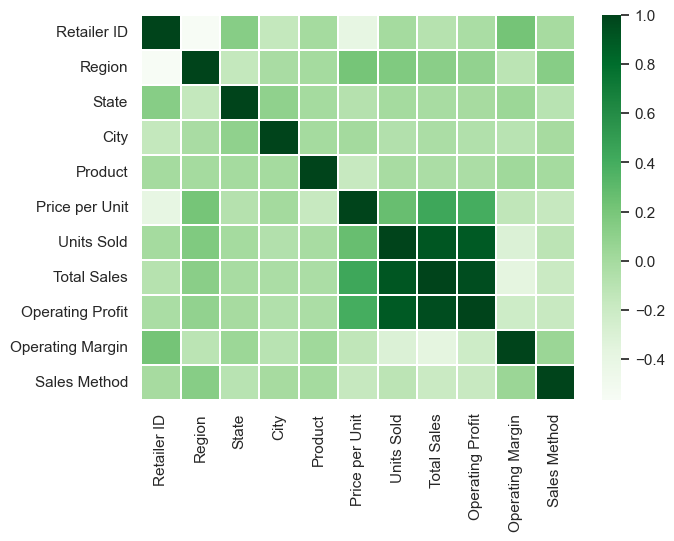

In [166]:
corr_data(data)

**- There's high correlation postive between Units Sold and Profit, Total Sales and Profit**

#### STUDYING TOTAL SALES AND PROFIT ACROSS PRODUCT SEGMENTS 

In [192]:
def sales_profit_product(data):
    group_product = data.groupby('Product').agg({'Total Sales':'sum','Operating Profit':'sum'}).reset_index()
    product_data = pd.DataFrame(group_product).sort_values(by=["Total Sales","Operating Profit"])

    color_palette = colors.qualitative.Pastel

    product = product_data['Product']
    pprofit= product_data['Operating Profit']
    psales = product_data['Total Sales']

    fig = go.Figure()
    fig.add_trace(go.Bar(x=product, 
                         y=psales, 
                         name='Total Sales',
                         marker_color=color_palette[8]))
    fig.add_trace(go.Bar(x=product, 
                         y=pprofit, 
                         name='Profit',
                         marker_color=color_palette[9]))

    fig.update_layout(title='Sales and Profit Analysis by Product segment',
                      xaxis_title='Customer Segment', yaxis_title='Amount',height = 400, width = 800)

    fig.show()

sales_profit_product(data)



**- Mens Street Footwear has the highest demand and hence has the most sales, that is crossing 200M USD in Sales and over 75M USD in operating profit followed by Women's apparel which is just over 175M USD in sales**

In [191]:
sales_profit_product = data.groupby('Product').agg({'Total Sales': 'sum', 'Operating Profit': 'sum'}).reset_index()
sales_profit_product['Sales_to_Profit_Ratio'] = sales_profit_product['Total Sales'] / sales_profit_product['Operating Profit']
sales_profit_product[['Product', 'Sales_to_Profit_Ratio']].sort_values(by = "Sales_to_Profit_Ratio", ascending = False)

,Product,Sales_to_Profit_Ratio
1,Men's Athletic Footwear,2.963990
5,Women's Street Footwear,2.838462
0,Men's Apparel,2.764081
4,Women's Athletic Footwear,2.735850
3,Women's Apparel,2.607958
2,Men's Street Footwear,2.521987


**- Although Men's street footwear has the highest profit, sales to profit ratio is higher for Men's Athletic footwear and women's street footwear at 2.96 and 2.83 respectively, which means profits are better from the latter.**